# Lloyd-max Quantization

In [1]:
import jax.numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def normalize(X):
    x = X - X.min(axis=0)
    return x/x.max(axis=0)

def codeword_losses(S, X):
    return ((S[:, np.newaxis] - X)**2).sum(axis=2)

def calc_optimal_Qinv_given_X(S, X):
    L = codeword_losses(S, X)
    Qinv = L.argmin(axis=1)
    return L[Qinv].mean(), Qinv

def calc_optimal_X_given_Qinv(S, Qinv):
    return np.array([S[Qinv==i].mean(axis=0) 
                     for i in range(2**R)
                     if (Qinv==i).sum() > 0])

def lloyd_max_algorithm(S, X, max_iter=200):
    loss_mse = max_iter*[0]
    for i in range(max_iter):
        loss_mse[i], Qinv = calc_optimal_Qinv_given_X(S, X)
        X = calc_optimal_X_given_Qinv(S, Qinv)
    return np.array(loss_mse), X, Qinv

def plot(S, X, Qinv, title):
    plt.scatter(*S.T, c=Qinv, alpha=0.8, cmap='Dark2')
    plt.scatter(*X.T, marker='X', c='black', s=100)
    plt.title(title)
    plt.axis('off')

/home/dsevero/miniconda3/envs/dsevero.com/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


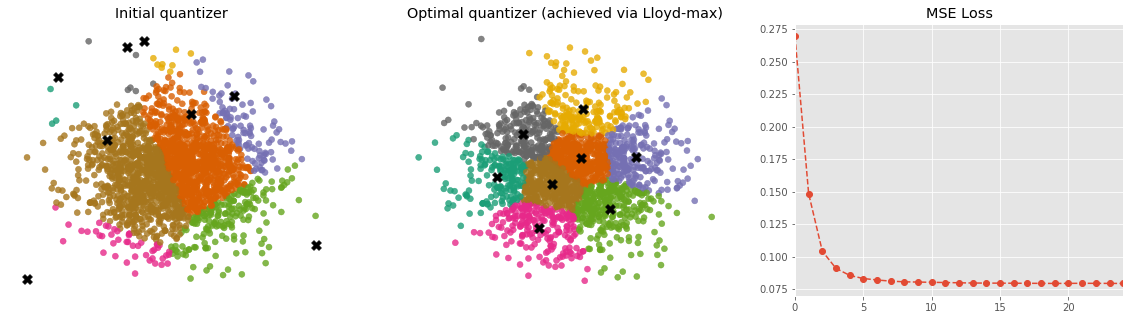

In [3]:
N: 'number of datapoints' = 2000
d: 'data dimension' = 2
R: 'rate (i.e. number of bits)' = 3
X: 'reconstruction points' = normalize(stats.uniform().rvs(size=(2**R, d)))
S: 'sample' = normalize(stats.norm().rvs(size=(N,d)))
loss_mse: 'MSE loss for given X and Qinv'
Qinv: 'assigns a region to each datapoint'

assert S.shape == (N, d)
assert X.shape == (2**R, d)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
loss_mse, Qinv = calc_optimal_Qinv_given_X(S, X)
plot(S, X, Qinv, 'Initial quantizer')

plt.subplot(1,3,2)
loss_mse, X_opt, Qinv_opt = lloyd_max_algorithm(S, X, max_iter=200)
plot(S, X_opt, Qinv_opt, 'Optimal quantizer (achieved via Lloyd-max)')

plt.subplot(1,3,3)
plt.plot(loss_mse, '--o')
plt.xlim(0, loss_mse.argmin())
plt.title('MSE Loss');